**Goal:** PCA of gene abundances in bone marrow derived macrophages (BMDMs) or an analogous cell line (J774s) at two time points after infection with either live *Mycobacterium tuberculosis* (Mtb), dead Mtb, or mock, based on kallisto estimates from the raw reads of <A href="https://www.ncbi.nlm.nih.gov/pubmed/28176867">Sci Rep 7:42225</A> (<A href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE88801">GSE88801</A>)

In [1]:
import cdt_reader

In [2]:
(colnames,genes,annotations,data) = cdt_reader.parse_cdt("GSE88801_kallisto_TPMs_thresh10.cdt",0.)

In [3]:
%matplotlib

Using matplotlib backend: Qt4Agg


In [4]:
len(data),len(data[0])

(9939, 36)

In [5]:
import numpy as np

In [6]:
D = np.array(data)
D.shape

(9939, 36)

In [ ]:
D = D[:,2:]

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

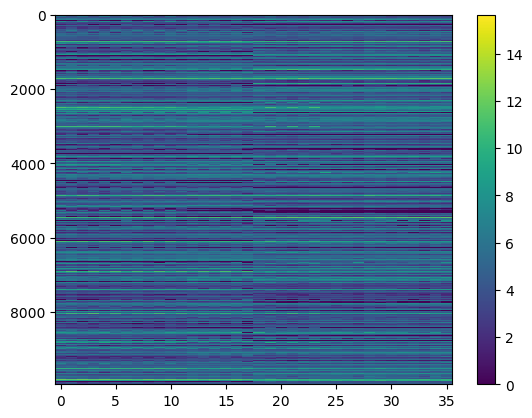

In [10]:
fig = plt.figure()
plt.imshow(D, interpolation = "none", aspect = "auto")
plt.colorbar()
fig

In [11]:
def col_center(d):
    mean = np.mean(d, axis = 0)
    return d - mean

def col_scale(d):
    norm = np.linalg.norm(d, axis = 0)
    return d/norm

def correlation_matrix(d):
    scaled = col_scale(col_center(d))
    return np.dot(scaled.T,scaled)

In [12]:
colnames

['BMDM_Live_1_4h',
 'BMDM_Live_1_24h',
 'BMDM_Live_2_4h',
 'BMDM_Live_2_24h',
 'BMDM_Live_3_4h',
 'BMDM_Live_3_24h',
 'BMDM_Dead_1_4h',
 'BMDM_Dead_1_24h',
 'BMDM_Dead_2_4h',
 'BMDM_Dead_2_24h',
 'BMDM_Dead_3_4h',
 'BMDM_Dead_3_24h',
 'BMDM_uninfected_1_4h',
 'BMDM_uninfected_1_24h',
 'BMDM_uninfected_2_4h',
 'BMDM_uninfected_2_24h',
 'BMDM_uninfected_3_4h',
 'BMDM_uninfected_3_24h',
 'J774_Live_1_4h',
 'J774_Live_1_24h',
 'J774_Live_2_4h',
 'J774_Live_2_24h',
 'J774_Live_3_4h',
 'J774_Live_3_24h',
 'J774_Dead_1_4h',
 'J774_Dead_1_24h',
 'J774_Dead_2_4h',
 'J774_Dead_2_24h',
 'J774_Dead_3_4h',
 'J774_Dead_3_24h',
 'J774_uninfected_1_4h',
 'J774_uninfected_1_24h',
 'J774_uninfected_2_4h',
 'J774_uninfected_2_24h',
 'J774_uninfected_3_4h',
 'J774_uninfected_3_24h']

In [13]:
P = D[:,(0,2)]

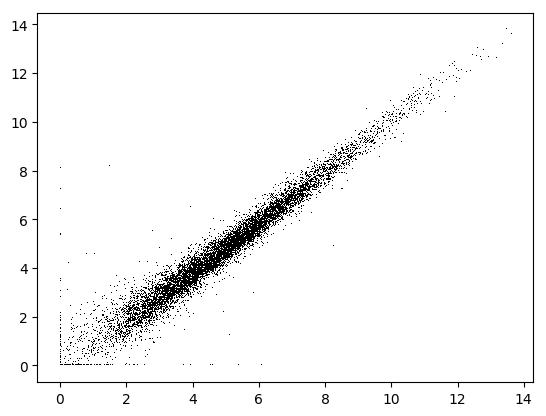

In [14]:
fig = plt.figure()
plt.plot(P[:,0],P[:,1],"k,")
fig

In [15]:
z = (np.linalg.norm(P, axis = 1) != 0.)
z.shape,z[0]

((9939,), True)

In [16]:
P = P[z,:]
P.shape

(9732, 2)

In [17]:
C = correlation_matrix(P)
C.shape

(2, 2)

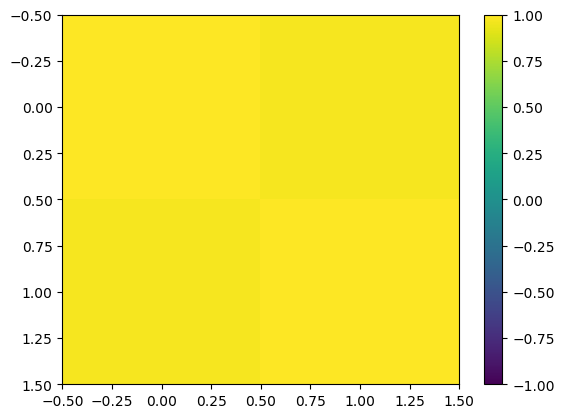

In [18]:
fig = plt.figure()
plt.imshow(C, aspect = "auto", vmin = -1, vmax = 1)
plt.colorbar()
fig

In [19]:
a = (P[:,0]+P[:,1])/2. # average (geometric mean)
m = (P[:,1]-P[:,0]) # difference

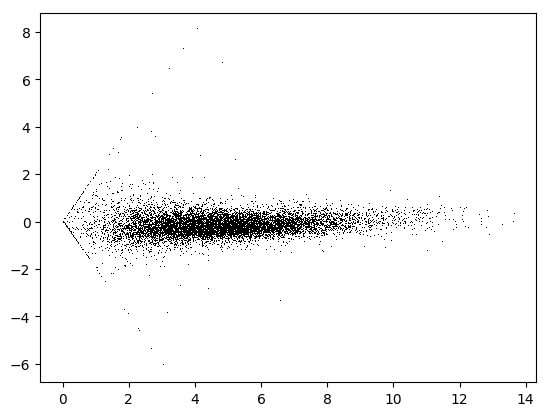

In [21]:
fig = plt.figure()
plt.plot(a,m,"k,")
fig

In [22]:
AM = np.vstack((a,m)).T
AM.shape

(9732, 2)

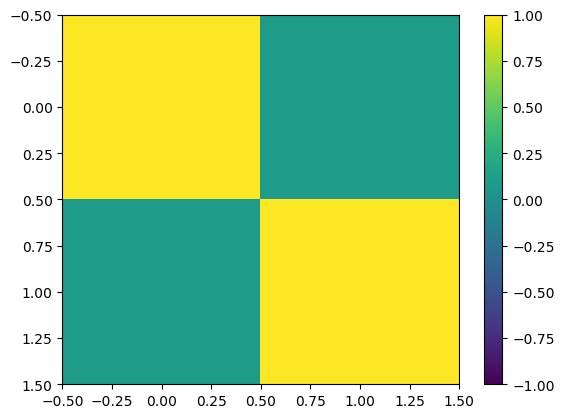

In [23]:
C = correlation_matrix(AM)
fig = plt.figure()
plt.imshow(C, aspect = "auto", vmin = -1, vmax = 1)
plt.colorbar()
fig

In [24]:
(eigenvalues, eigenvectors) = np.linalg.eigh(correlation_matrix(P))
print(eigenvectors)
print(eigenvalues)

[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]
[ 0.02747263  1.97252737]


In [25]:
np.sqrt(1./2)

0.70710678118654757

In [26]:
u,s,v = np.linalg.svd(col_center(P).T, full_matrices=False)
print(u)
print(s)

[[-0.69794628 -0.71615012]
 [-0.71615012  0.69794628]]
[ 291.38159074   34.37642297]


In [27]:
v = s**2
v/sum(v)

array([ 0.98627242,  0.01372758])

In [28]:
eigenvalues/sum(eigenvalues)

array([ 0.01373631,  0.98626369])

In [29]:
A = col_center(D.T)

In [30]:
u,s,v = np.linalg.svd(A.T, full_matrices = False)

In [31]:
u.shape

(9939, 36)

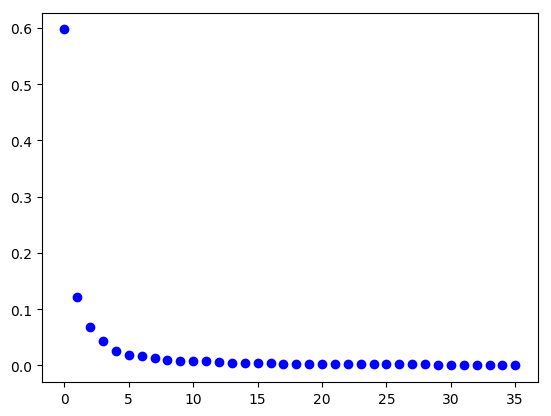

In [32]:
v = s**2
fig = plt.figure()
plt.plot(v/sum(v),"bo")
fig

In [33]:
projected = np.dot(A,u)
projected.shape

(36, 36)

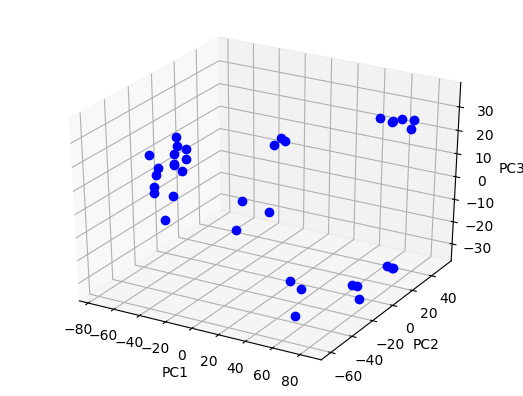

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(projected[:,0],projected[:,1],projected[:,2],"bo")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
fig

In [ ]:
colors = {"BMDM":{"Live":"#ff0000", # red
                  "Dead":"#00ff00", # green
                  "uninfected":"#0000ff"}, # blue
        "J774":{"Live":"#ffaaaa",
                  "Dead":"#aaffaa",
                  "uninfected":"#aaaaff"}}
markers = {"4h":"^","24h":"o"}

In [35]:
colors = {"BMDM":{"Live":"red",
                  "Dead":"green", 
                  "uninfected":"blue"}, 
        "J774":{"Live":"magenta",
                  "Dead":"orange",
                  "uninfected":"cyan"}}
markers = {"4h":"^","24h":"o"}

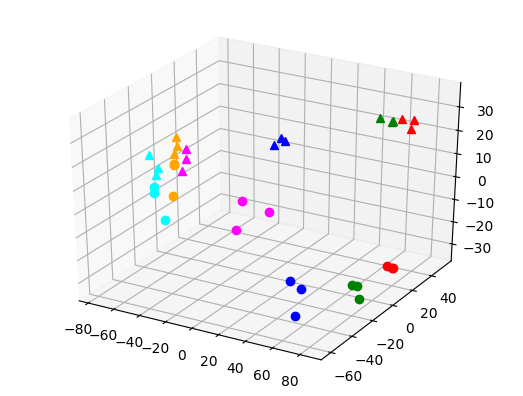

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(projected[:,0],projected[:,1],projected[:,2],"k,")
for (n,name) in enumerate(colnames):
    (strain,infection,rep,time) = name.split("_")
    marker = markers[time]
    color = colors[strain][infection]
    ax.plot([projected[n,0]],[projected[n,1]],[projected[n,2]],
           marker = marker, color = color, linestyle = "none")
fig